In [1]:
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np
# csv reading library
import csv
# interpolation library
from scipy.interpolate import interp1d

In [2]:
#################################################
######          CHIP L05C11 - P02          ######

folder = 'data/'
date1 = '2017-10-05'

path1 = folder+date1+'/'+date1

#################################################
###### FIRST STRUCTURE ANALYZED: X2,       ######
###### grating couplers and waveguide only ######

# Read CSV files: structure X2
with open(path1+'_deg14in14out_X2_wlen1520-1580_lowG.tsv', 'r') as fp1:
    reader = csv.reader(fp1, delimiter='\t', quotechar='"')
    deg14 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path1+'_wrong-deg12in12out_X2_wlen1520-1580_lowG.tsv', 'r') as fp1:
    reader = csv.reader(fp1, delimiter='\t', quotechar='"')
    wdeg12 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path1+'_wrong-deg14in14out_X2_wlen1520-1580_lowG_v2.tsv', 'r') as fp1:
    reader = csv.reader(fp1, delimiter='\t', quotechar='"')
    wdeg14v2 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path1+'_wrong-deg14in14out_X2_wlen1520-1580_lowG_v3.tsv', 'r') as fp1:
    reader = csv.reader(fp1, delimiter='\t', quotechar='"')
    wdeg14v3 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path1+'_wrong-deg16in16out_X2_wlen1520-1580_lowG.tsv', 'r') as fp1:
    reader = csv.reader(fp1, delimiter='\t', quotechar='"')
    wdeg16 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path1+'_wrong-deg18in18out_X2_wlen1520-1580_lowG.tsv', 'r') as fp1:
    reader = csv.reader(fp1, delimiter='\t', quotechar='"')
    wdeg18 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path1+'_wrong-deg20in20out_X2_wlen1520-1580_lowG.tsv', 'r') as fp1:
    reader = csv.reader(fp1, delimiter='\t', quotechar='"')
    wdeg20 = np.array([row for row in reader], dtype=float)
    
del reader

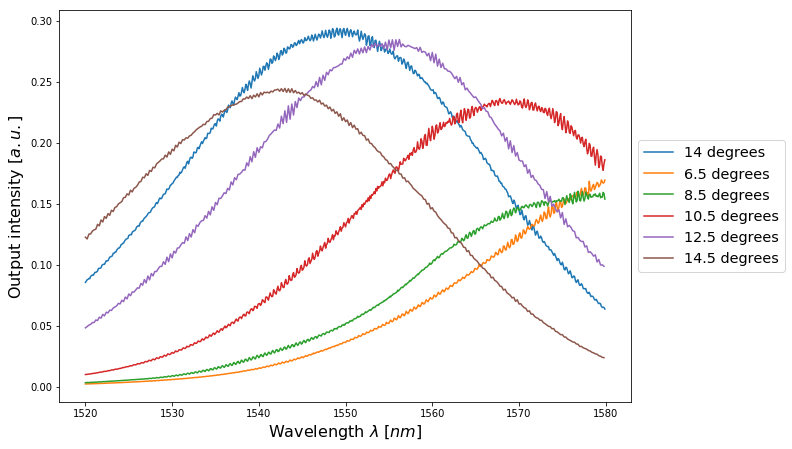

In [8]:
fig = plt.figure(figsize=(12.8, 7.2)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)
ax1.plot(deg14[:,0], deg14[:,1], label='14 degrees')
ax1.plot(wdeg12[:,0], wdeg12[:,1], label='6.5 degrees')
#ax1.plot(wdeg14v2[:,0], wdeg14v2[:,1])
ax1.plot(wdeg14v3[:,0], wdeg14v3[:,1], label='8.5 degrees')
ax1.plot(wdeg16[:,0], wdeg16[:,1], label='10.5 degrees')
ax1.plot(wdeg18[:,0], wdeg18[:,1], label='12.5 degrees')
ax1.plot(wdeg20[:,0], wdeg20[:,1], label='14.5 degrees')

ax1.set_xlabel(r'Wavelength $\lambda$ $[nm]$', fontsize=16)
ax1.set_ylabel(r'Output intensity $[a.u.]$', fontsize=16)

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax1.legend(loc='center left', fontsize='x-large', bbox_to_anchor=(1, 0.5))

plt.show()
plt.close()

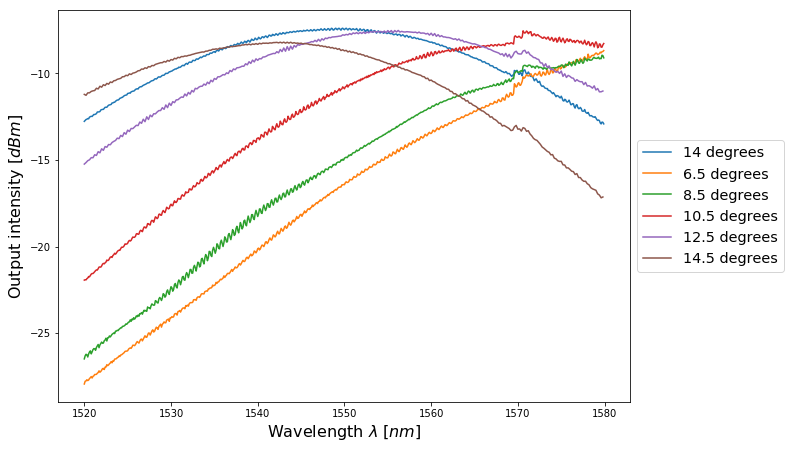

In [9]:
fig = plt.figure(figsize=(12.8, 7.2)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)
ax1.plot(deg14[:,0], 10*np.log10(deg14[:,2]), label='14 degrees')
ax1.plot(wdeg12[:,0], 10*np.log10(wdeg12[:,2]), label='6.5 degrees')
#ax1.plot(wdeg14v2[:,0], 10*np.log10(wdeg14v2[:,2]))
ax1.plot(wdeg14v3[:,0], 10*np.log10(wdeg14v3[:,2]), label='8.5 degrees')
ax1.plot(wdeg16[:,0], 10*np.log10(wdeg16[:,2]), label='10.5 degrees')
ax1.plot(wdeg18[:,0], 10*np.log10(wdeg18[:,2]), label='12.5 degrees')
ax1.plot(wdeg20[:,0], 10*np.log10(wdeg20[:,2]), label='14.5 degrees')

ax1.set_xlabel(r'Wavelength $\lambda$ $[nm]$', fontsize=16)
ax1.set_ylabel(r'Output intensity $[dBm]$', fontsize=16)

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax1.legend(loc='center left', fontsize='x-large', bbox_to_anchor=(1, 0.5))

plt.show()
plt.close()

In [5]:
def FWHM(y):
    # version 2.0
    max_y = max(y)  # Find the maximum y value
    min_y = min(y)  # Find the minimum y value, ver 2.0
    #xs = [x for x in range(len(y)) if y[x] > max_y/2.0] # ver 1.0
    xs = [x for x in range(len(y)) if y[x] > max_y/2.0 + min_y/2.0] # ver 2.0
    return [min(xs), max(xs)]

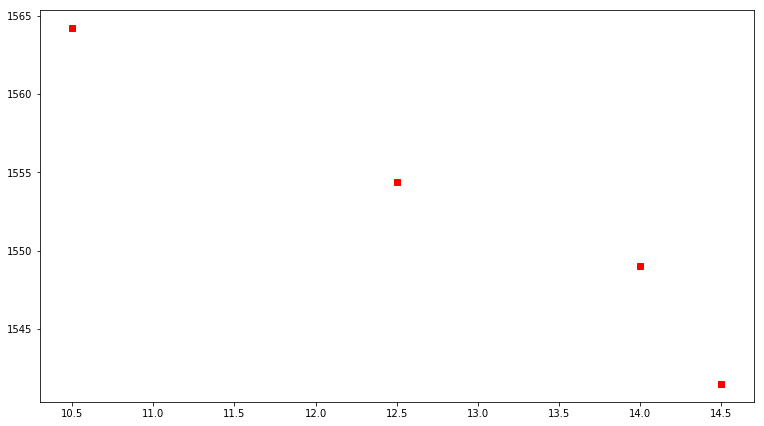

In [6]:
x = [14, 10.5, 12.5, 14.5]
y = [np.mean(deg14[FWHM(deg14[:,1]),0]), ]
y.append( np.mean(wdeg16[FWHM(wdeg16[:,1]),0]) )
y.append( np.mean(wdeg18[FWHM(wdeg18[:,1]),0]) )
y.append( np.mean(wdeg20[FWHM(wdeg20[:,1]),0]) )

fig = plt.figure(figsize=(12.8, 7.2)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)
ax1.plot(x, y, 'rs')

plt.show()
plt.close()